In [1]:
import os

import cv2
import numpy as np
import matplotlib.pyplot as plt

from ultralytics import YOLO

import metrics
import feature_extractor

In [5]:
model = YOLO("C:\\Users\\Nick\\Desktop\\oil_segmentation_old\\notebooks\\yolo\\weights\\yolov8_nano_3.pt")

In [3]:
test_imgs_path = 'C:\\Users\\Nick\\Desktop\\final_dataset_fix\\test\\images'
test_masks_path = 'C:\\Users\\Nick\\Desktop\\final_dataset_fix\\test\\labels'
test_imgs_dir = os.fsencode(test_imgs_path)
test_masks_dir = os.fsencode(test_masks_path)

Ultralytics YOLOv8.0.28  Python-3.9.16 torch-2.0.0+cu117 CUDA:0 (NVIDIA GeForce GTX 1050 Ti, 4096MiB)
YOLOv8n-seg summary (fused): 195 layers, 3258259 parameters, 0 gradients, 12.0 GFLOPs

0: 640x640 1 1, 54.0ms
Speed: 1.0ms pre-process, 54.0ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)


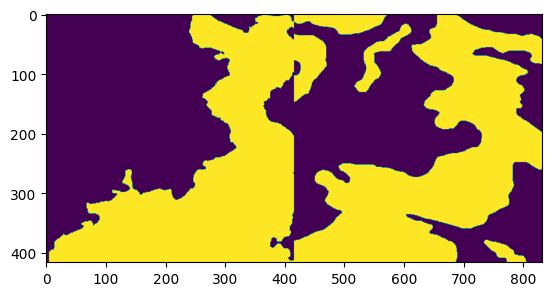


0: 640x640 1 1, 55.0ms
Speed: 2.0ms pre-process, 55.0ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)


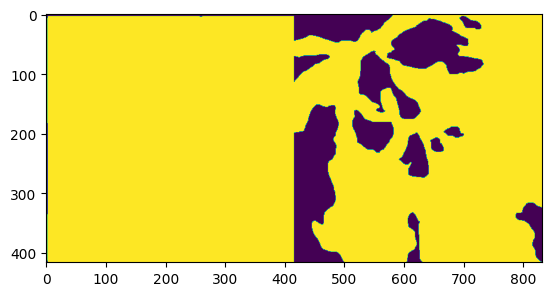


0: 640x640 54.0ms
Speed: 2.0ms pre-process, 54.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


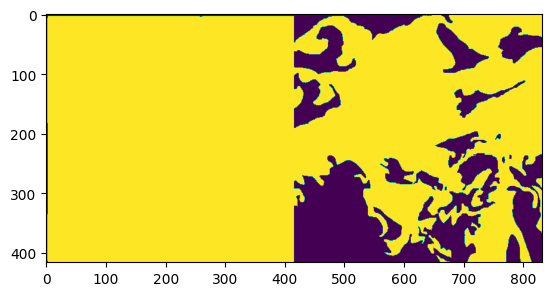


0: 640x640 1 1, 56.0ms
Speed: 2.0ms pre-process, 56.0ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)


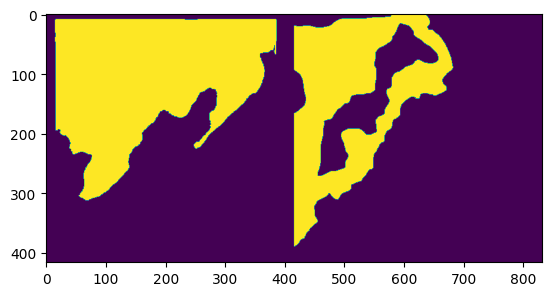


0: 640x640 1 1, 53.0ms
Speed: 2.0ms pre-process, 53.0ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)


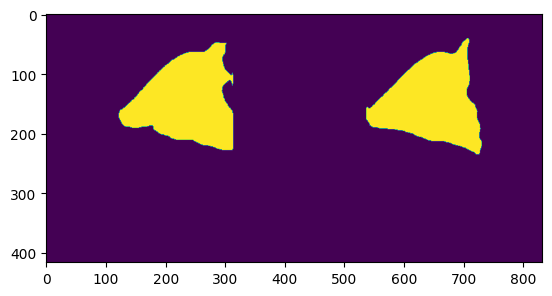


0: 640x640 1 1, 54.0ms
Speed: 3.0ms pre-process, 54.0ms inference, 7.0ms postprocess per image at shape (1, 3, 640, 640)


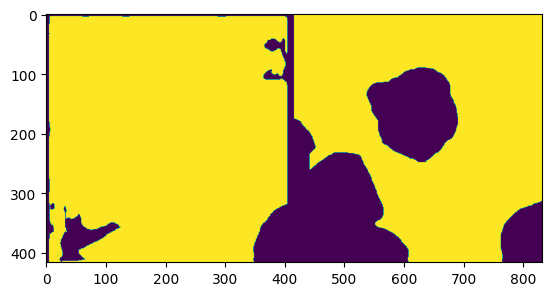


0: 640x640 1 1, 55.0ms
Speed: 2.0ms pre-process, 55.0ms inference, 6.0ms postprocess per image at shape (1, 3, 640, 640)


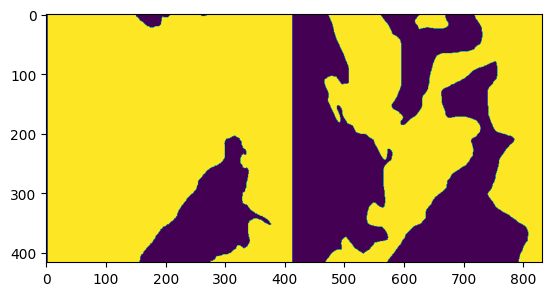

0.645


In [6]:
iou = []

for file in os.listdir(test_imgs_dir):
    filename = os.fsdecode(file)
    if filename.endswith(".jpg"):
        test_img, _, test_mask = feature_extractor.parse_img_label(test_imgs_path + "\\" + filename, test_masks_path + "\\" + filename)
        orig = test_img.copy()
        h, w, _ = test_img.shape
        predictions = model.predict(test_img)
        for object in predictions:
            if object.masks is not None:
                mask = np.zeros((h, w))
                xy = [(object.masks.segments[0] * np.array([[w, h]])).astype(int)]
                cv2.fillPoly(mask, xy, (255, 255, 255))
                mask = (mask/255).round()
        iou.append(metrics.masks_iou(mask, test_mask))
        vis = np.concatenate((mask, test_mask), axis=1)
        plt.imshow(vis)
        plt.show()
    else:
        continue
        
print(round(sum(iou)/len(iou), 3))

Сравнение моделей:

| Model | Optimizer | Lr | Epochs | Data | IoU
|:------|:----------|:---|:--------------|:-------|:-----
| nano | SGD | 0.01 | 30 | Medium | 0.411
| nano | Adam | 0.001 | 30 | Medium | 0.659
| nano | AdamW | 0.001 | 30 | Medium | 0.645
| s | SGD | 0.01 | 30 | Medium | 0.55
| s | Adam | 0.001 | 30 | Medium | 0.679
| s | AdamW | 0.001 | 30 | Medium | 0.646